In [39]:
import pandas as pd

# Plot imports
import seaborn as sns
sns.set_style('whitegrid')

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# For evaluating our ML results
from sklearn import metrics
#Import os
import os
os.chdir("/Users/ariedamuco/Dropbox (CEU Econ)/TextAnalysisCEU")
data= pd.read_csv("Input/Social_Network_Ads.csv")


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [41]:
#summary statistics on the data
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [42]:
#columns names
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [43]:
# Preview
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [44]:
# Preview
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [45]:
# Create a set of dummy variables from the sex variable
df_sex = pd.get_dummies(data['Gender'])

In [46]:
# Add the dummy variables to the main dataframe
df= pd.concat([data, df_sex], axis=1)

In [47]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Female,Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1


In [48]:

#apparently males, older and richer are more likely to purchase
df.groupby('Purchased').mean()

,User ID,Age,EstimatedSalary,Female,Male
Purchased,,,,,
0,1.569116e+07,32.793774,60544.747082,0.494163,0.505837
1,1.569222e+07,46.391608,86272.727273,0.538462,0.461538


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff728874278>,
      dtype=object)

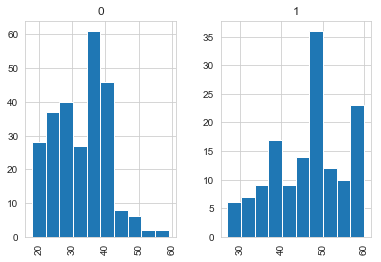

In [49]:
data.hist(column='Age', by='Purchased')


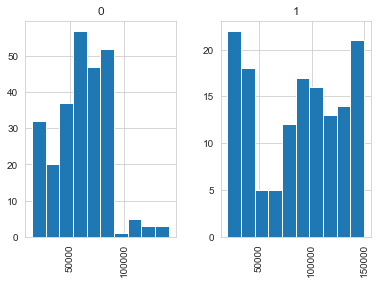

In [50]:
#some graphical analysis
ax=data.hist(column='EstimatedSalary', by='Purchased')

In [51]:

#drop user id and gender and male as we do not need them , axis=1 along the columns 
df.drop(df.columns[[0, 1,-1]], axis=1, inplace=True)
#inplace : boolean, default False. Modify the DataFrame in place (do not create a new object)

In [52]:
df

,Age,EstimatedSalary,Purchased,Female
0,19,19000,0,0
1,35,20000,0,0
2,26,43000,0,1
3,27,57000,0,1
4,19,76000,0,0
...,...,...,...,...
395,46,41000,1,1
396,51,23000,1,0
397,50,20000,1,1
398,36,33000,0,0



The reason to drop male is to avoid multicollinearity.
Multicollinearity occurs due to the dummy variables we created. 


In [54]:
#Set Y as Target class, Purchased
Y = df.Purchased

In [55]:
# Preview
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [57]:
#get the rest of the observations in the X vector
X=df.drop(['Purchased'],axis=1)

We split our data into training and testing data sets using SciKit Learn's built-in train_test_split method

In [58]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [60]:
# Make a new log_model
logistic = LogisticRegression()

In [61]:
# Now fit the new model
logistic.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
# Predict the classes of the testing data set
class_predict = logistic.predict(X_test)

In [64]:
# Compare the predicted classes to the actual test classes
print ("METRIC SCORE: ", metrics.accuracy_score(Y_test,class_predict))

NameError: name 'metrics' is not defined